<a href="https://colab.research.google.com/github/mavenceslau/Challenge-Data-Science-Alura-Cash/blob/master/notebooks/Notebook_02_Vizualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 02 - Aprendendo com os dados: criando um modelo de previsão de inadimplência - Vizualização dos dados

Com os dados tratados anteriormente, iremos realizar algumas análises visuais com o conjunto de dados.

In [ ]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils import config_exibicao, config_graficos, box, remove_outlier

Com a função **config_exibicao** iremos configurar a exibição de dataframes pandas, de modo que os mesmos possam exibir o maior número de informações nas células sem cortar conteudo.

E com a função **config_graficos** vamos configurar a exibição dos gráficos.

Mais informações sobre essas funções podem ser vistas no arquivo [utils.py](https://github.com/mavenceslau/Challenge-Data-Science-Alura-Cash/blob/master/notebooks/utils.py)

In [ ]:
config_exibicao()
config_graficos()

Importando a base de dados e exibindo os primeiros registros

In [ ]:
url = '../data/processed/alura_cash_tratado.csv'
dados = pd.read_csv(url)
dados.head()

,pessoa_idade,pessoa_salario_anual,pessoa_status_propriedade,pessoa_tempo_trabalho,emprestimo_motivo,emprestimo_pontuacao,emprestimo_valor_total,emprestimo_taxa_juros,emprestimo_inadimplente,emprestimo_renda_percentual,historico_inadimplencia,historico_tempo_credito
0,22,50000.0,Hipotecada,0,Pagamento de débitos,A,12800.0,5.79,0,0.26,N,2.0
1,26,84996.0,Alugada,0,Médico,B,9000.0,11.26,0,0.11,N,2.0
2,24,55782.0,Alugada,3,Melhora do lar,A,17000.0,7.51,0,0.30,N,2.0
3,25,125000.0,Própria,9,Pessoal,B,25000.0,10.59,0,0.20,N,2.0
4,23,44340.0,Própria,0,Empreendimento,C,3000.0,12.98,0,0.07,S,3.0


In [ ]:
print(f'O dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset possui 32316 linhas e 12 colunas


## Analisar a variável target: emprestimo_inadimplente

In [ ]:
frequencia = dados.emprestimo_inadimplente.value_counts()
percentual = dados.emprestimo_inadimplente.value_counts(normalize = True) * 100

In [ ]:
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)' : round(percentual, 2)})
dist_freq.rename_axis('Inadimplente', axis = 'columns', inplace=True)
dist_freq

Inadimplente,Frequência,Porcentagem (%)
0,25047,77.51
1,7269,22.49


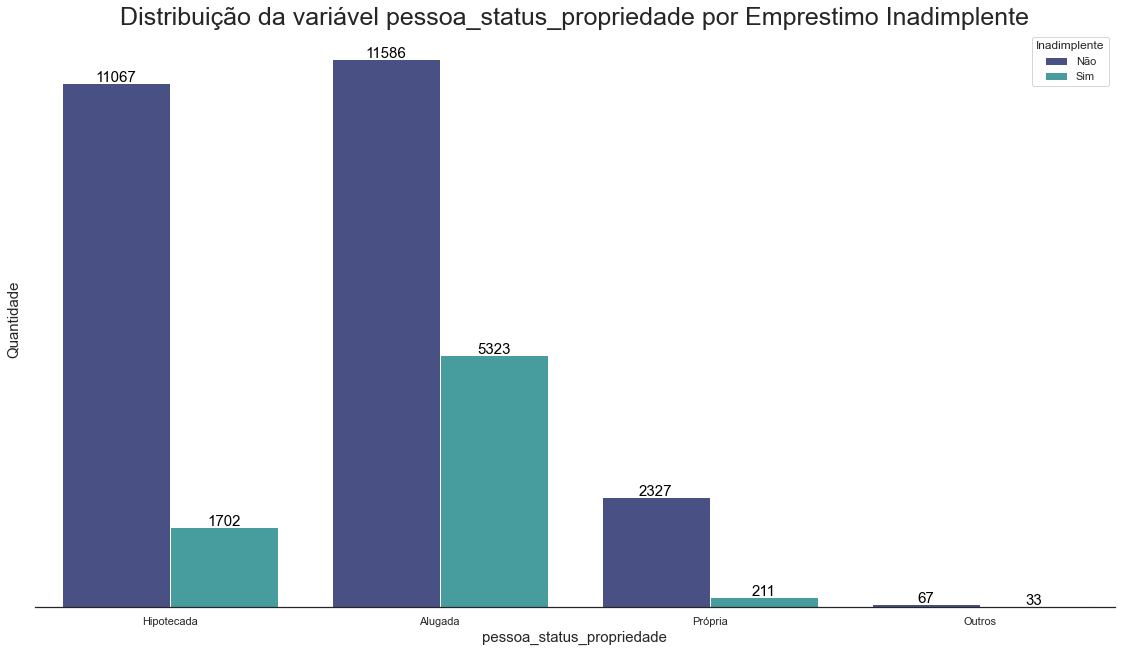

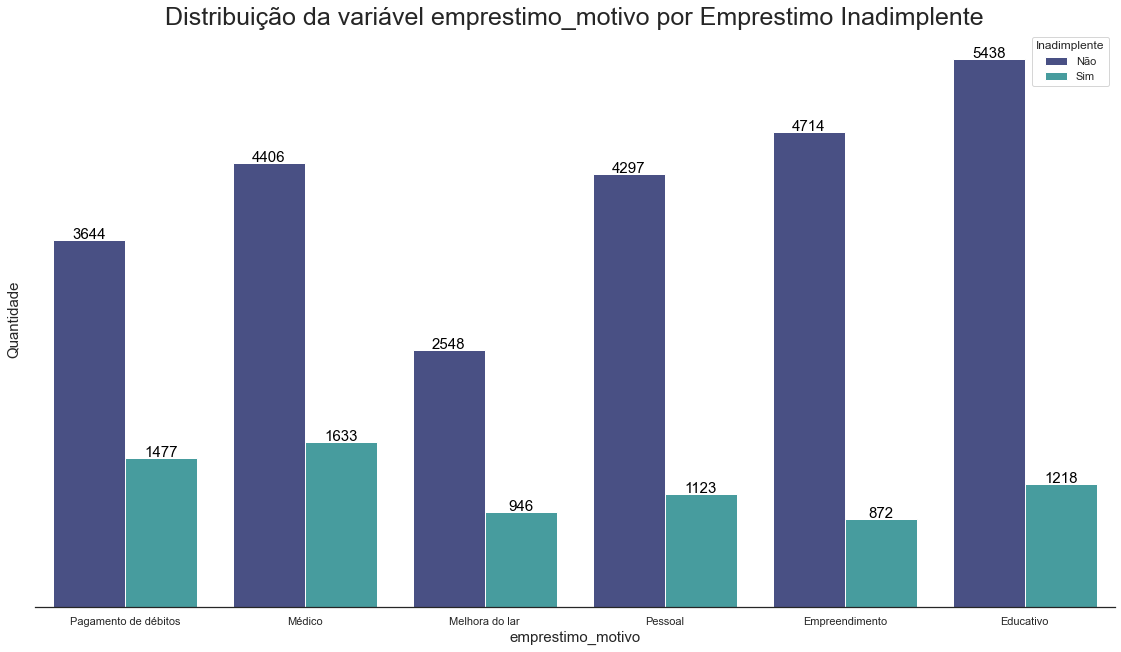

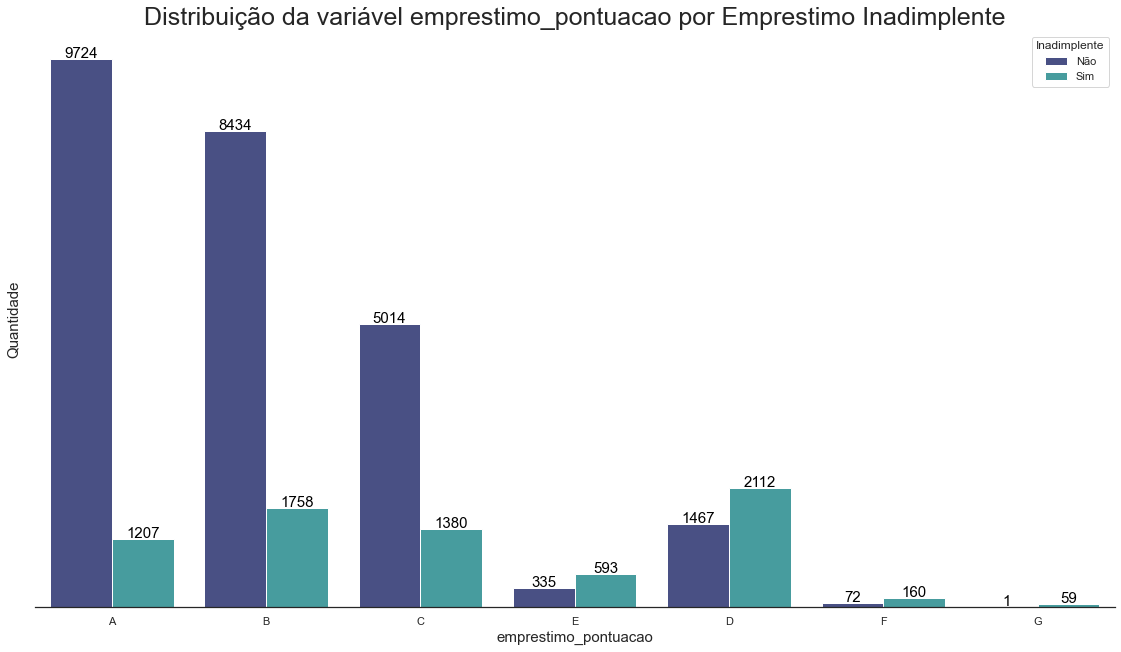

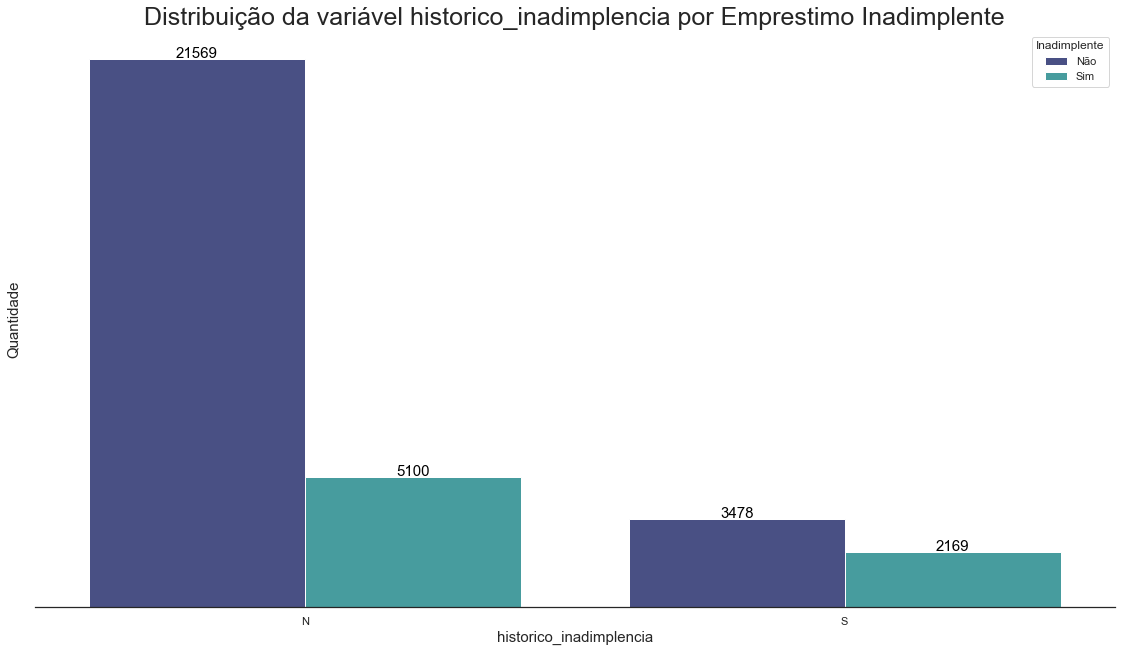

In [ ]:
categorias = ['pessoa_status_propriedade', 'emprestimo_motivo', 'emprestimo_pontuacao', 'historico_inadimplencia']

for cat in categorias:
    custom_params = {"axes.spines.right": False,"axes.spines.left": False, "axes.spines.top": False}
    sns.set_theme(context="notebook", style="white", rc=custom_params)
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_axes([0,0,1,1])
    ax = sns.countplot(data = dados, x = cat, hue = 'emprestimo_inadimplente', palette = 'mako')
    ax.set_title(f'Distribuição da variável {cat} por Emprestimo Inadimplente', fontsize = 25)
    ax.set_xlabel(cat, fontsize = 15)
    ax.set_ylabel('Quantidade', fontsize = 15)
    ax.set_yticklabels([])
    plt.legend(title='Inadimplente', labels=['Não', 'Sim'])
    for i in ax.patches:
        ax.annotate(i.get_height(),
            (i.get_x() + i.get_width() / 2, i.get_height()),
            ha='center',
            va='baseline',
            fontsize=15,
            color='black',
            xytext=(0, 1),
            textcoords='offset points')
    plt.show()

Analisando os gráficos acima podemos perceber que a maior parte de clientes inadimplentes são os que possuem casa alugada;

que o motivo do emprestimo foi para despesas médicas;

pontuação D no score de crédito;

e não possuem hitórico de inadimplencia.

## Analise de outras variáveis

[]

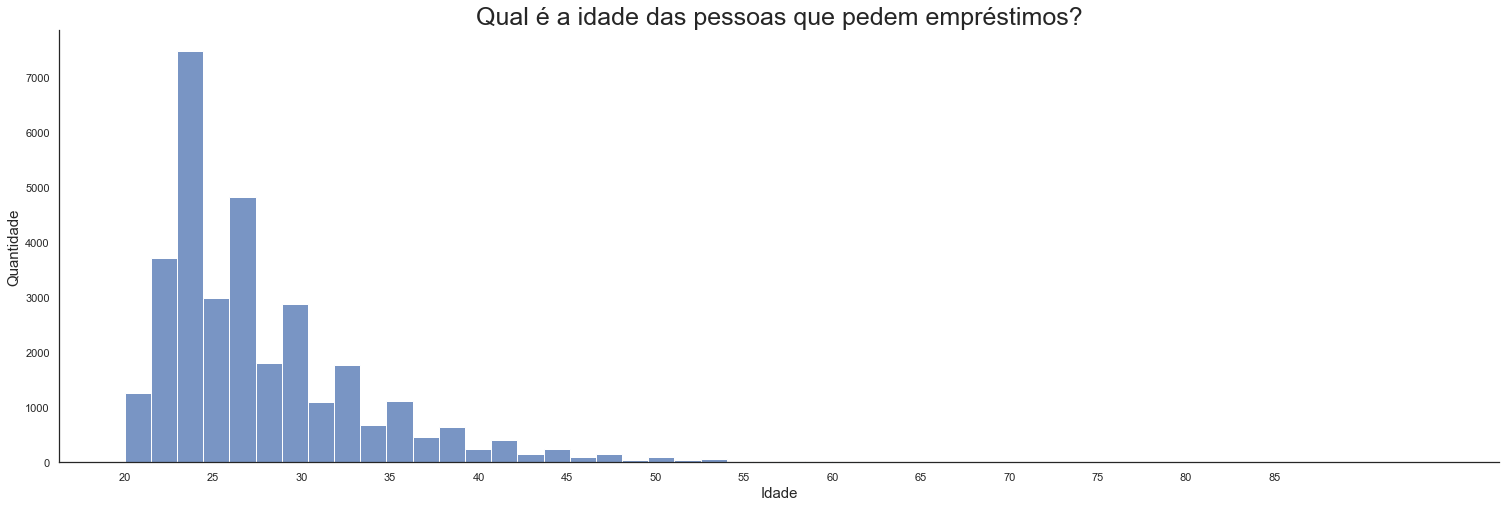

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="notebook", style="white", rc=custom_params)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes([0,0,1,1])
ax = sns.histplot(data = dados, x = 'pessoa_idade', bins = 50)
ax.figure.set_size_inches(20, 6)
ax.set_title('Qual é a idade das pessoas que pedem empréstimos?', fontsize=25)
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15)
plt.xticks(list(np.arange(15, 90, step=5)))
plt.plot()

A maioria dos empréstimos são solicitados por pessoas com idades entre 20 e 25 anos, e podemos ver que a maioria dos empréstimos são solicitados por pessoas mais jovens.


[]

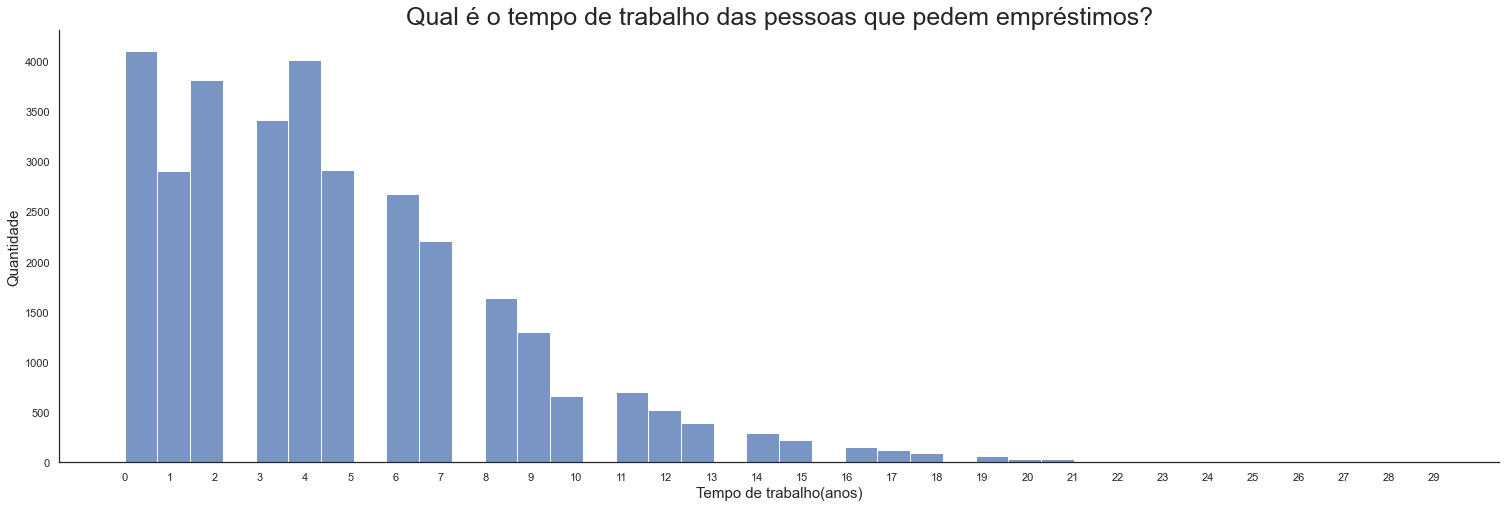

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="notebook", style="white", rc=custom_params)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes([0,0,1,1])
ax = sns.histplot(data = dados, x = 'pessoa_tempo_trabalho', bins = 40)
ax.figure.set_size_inches(20, 6)
ax.set_title('Qual é o tempo de trabalho das pessoas que pedem empréstimos?', fontsize=25)
ax.set_xlabel('Tempo de trabalho(anos)', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15)
plt.xticks(list(np.arange(0, 30, step=1)))
plt.plot()

A maioria dos pedidos de empréstimos são de pessoas entre 0 e 1 ano de serviço. Com 4 anos de serviço existe muitos solicitantes também.

### Matrix de Correlação e mapa de calor

No mapa de calor podemos ter uma visão melhor da correlação entre as varáveis, os possíveis valores de correlação são entre -1 e 1.

Onde valores próximos de -1 indicam uma forte correlação negativa, que significa que, quando uma variável aumenta seu valor, a outra diminui.

No caso do valores perto de 1 nos diz que existe uma forte correlação positiva, na qual quando um valor da variavel aumenta a outra também aumenta ou quando diminui, a outra também diminui.

Se o valor é próximo a 0, significa que não existe grande correlação entre as variáveis.

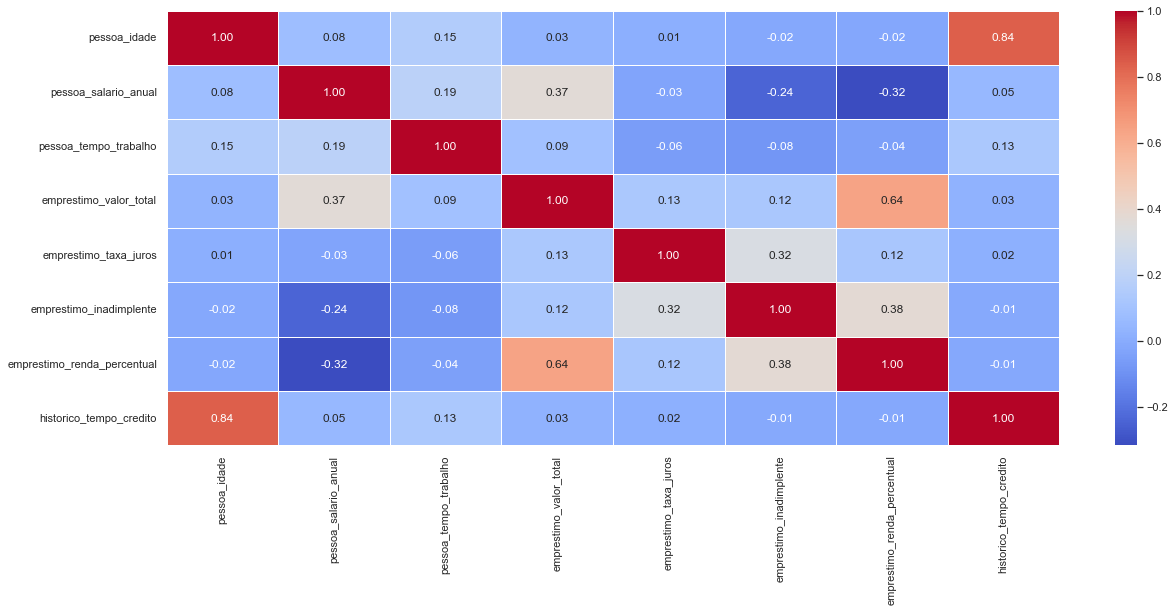

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(dados.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = 'coolwarm')
plt.show()

Analisando o mapa de calor podemos observar que não existe grande correlação da variável target **emprestimo_inadiplente** com as demais. 

Porém entre **historico_tempo_credito** e **pessoa_idade** possue 0.84 e entre **emprestimo_renda_percentual** e **emprestimo_valor_total** de 0.64, ambas tem uma forte correlação.